https://pubchem.ncbi.nlm.nih.gov/rest/pug/pathway/pwacc/wikipathways:WP4396/geneids/TXT

Non alcoholic fatty liver pathway

WP2874

WP2289

PA165986279

[Here](https://www.wikipathways.org/index.php/Special:SearchPathways?query=liver+disease+pathway&doSearch=1) is a whole list of potential liver disease pathways, which could be useful...

In [6]:
# Could find GENE ids with the above PugREST URL,
# then need to map these to GeneIDs using PugREST
import matplotlib.pyplot as plt

target_url = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/gene/geneid/{}/summary/JSON'

In [7]:
nafl = [   355,
            356,
            468,
            578,
            581,
            637,
            841,
            1050,
            1571,
            1649,
            1965,
            2081,
            3551,
            3552,
            3569,
            3570,
            3630,
            3643,
            3667,
            3725,
            3952,
            3953,
            4092,
            4217,
            4296,
            5313,
            5465,
            5599,
            6256,
            6347,
            6720,
            7124,
            7132,
            7186,
            7412,
            7494,
            8660,
            9021,
            9370,
            9451,
            9971,
            10018,
            10062,
            27113,
            54205,
            83737]

In [8]:
genes = [
    1555,
    1576,
    1581,
    2194,
    6256,
    6319,
    6720,
    10062,
    64240,
    64241,
]

In [9]:
genes = [
    570,
    1244,
    1576,
    1581,
    5243,
    6554,
    6822,
    7421,
    8647,
    8714,
    8856,
    9970,
    9971,
    10257,
    10599,
    123264,
    200931
]

In [10]:
genes = [
    1244,
    1544,
    1548,
    1565,
    1571,
    2944,
    2950,
    2952,
    6783,
    6817,
    6818,
    6822,
    7366,
    8714,
    9429,
    10257,
    54578,
    54600,
    54658,
    445329
]

In [11]:
import requests, json

url = requests.get(target_url.format(','.join(map(str, nafl
                                                  ))) )
text = url.text


data = json.loads(text)


In [12]:
targets_symbols = []
for s in data['GeneSummaries']['GeneSummary']:
    targets_symbols.append((s['Symbol']))

In [13]:
len(targets_symbols)

46

46 Genes in this pathway

In [15]:
import pandas as pd
import config
import numpy as np

targets = pd.read_sql_query('select PUBCHEM_AID, GeneSymbol from targets WHERE GeneSymbol IS NOT NULL', con=config.Config.DB_URI)

In [16]:
aop_targets = targets.query('GeneSymbol in @targets_symbols')

In [17]:
aop_targets.GeneSymbol.nunique()

11

In [18]:
aop_targets.PUBCHEM_AID.nunique()

37

In [19]:
aid_list = [str(aid)for aid in aop_targets.PUBCHEM_AID.unique()]

aid_string = ", ".join(map(str, aid_list))
aid_query = f'({aid_string})'

actives_query = 'SELECT c.PUBCHEM_CID as CID, c.PUBCHEM_AID as AID, c.PUBCHEM_SID as SID ' \
                'FROM concise c ' \
                'WHERE c.PUBCHEM_AID in {} AND c.PUBCHEM_ACTIVITY_OUTCOME == "Active" AND ' \
                'c.PUBCHEM_CID is not null AND c.PUBCHEM_SID is not null'.format(aid_query)

active_cmps = pd.read_sql_query(actives_query, con=config.Config.DB_URI)
active_cmps['SID'] = active_cmps['SID'].astype(int)

sid_list = [str(sid)for sid in active_cmps.SID]

sid_string = ", ".join(map(str, sid_list))
sid_query = f'({sid_string})'

hill_params_query = 'SELECT  SID, AID, AC50, TOP, SLOPE, MSE ' \
                    'FROM hill_models ' \
                    'WHERE AID in {} AND SID in {} '.format(aid_query, sid_query)

hill_params = pd.read_sql_query(hill_params_query, con=config.Config.DB_URI)

# this merge is necessary because
# the former query gathers all data
# for all sid and aid that have any active cmps
# not just the pairs of active sid, aid
# could be solved by a SQLite join, but
# right now takes too long
hill_merged = pd.merge(hill_params, active_cmps[['SID', 'CID', 'AID']].drop_duplicates(['SID', 'CID', 'AID']), on=['SID', 'AID'])
print(hill_merged.head())

      SID     AID          AC50         TOP     SLOPE           MSE       CID
0  842207  504313  1.040636e+01  120.000000  8.000000  8.581584e+03  54690395
1  844649    2765  1.582619e+01   46.347894  8.000000  4.321037e-03    646981
2  844649  449757  3.100408e+01   95.567507  1.380095  1.464587e+01    646981
3  844928  504313  3.449394e-07 -100.000000  0.893567  1.589841e-07    647258
4  845153  504313  3.449394e-07 -100.000000  0.893567  1.589841e-07    647487


In [20]:
aop_targets

,PUBCHEM_AID,GeneSymbol
541,2765,BCL2L11
542,2765,BCL2L11
543,2765,BCL2L11
544,2765,BCL2L11
545,449757,BCL2L11
546,449757,BCL2L11
547,449757,BCL2L11
548,449757,BCL2L11
549,504342,BCL2L11
550,504342,BCL2L11


In [23]:
hill_merged.groupby('CID')['AC50'].mean().sort_values(ascending=True)

CID
5105544      1.841778e-11
135490279    3.842912e-11
3588811      5.453873e-11
659314       7.458261e-11
1346017      1.249213e-10
                 ...     
60196431     3.210881e+02
60934        7.790456e+02
7607                  NaN
2320898               NaN
4178804               NaN
Name: AC50, Length: 1216, dtype: float64

In [25]:
for gene, assays in aop_targets.groupby('GeneSymbol'):
    print(gene, assays.PUBCHEM_AID.nunique())

BCL2L11 5
CASP8 1
EIF2AK3 2
JUN 1
MAP3K5 2
NR1H4 4
PKLR 12
PPARA 2
RXRA 3
TNF 4
XBP1 1


In [26]:
hill_merged.AID.nunique()

25

In [30]:
from curve_fitting import hill_curve
from curvep import curveP, CONCLIST

xs = np.asarray(CONCLIST)

dfs = []

for (aid, cid), params in hill_merged.merge(aop_targets.rename(columns={'PUBCHEM_AID': 'AID', 'GeneSymbol': 'Target'})).dropna().groupby(['AID', 'CID']):

    params = params[params.MSE == params.MSE.min()]

    curve = hill_curve(xs, params.AC50.iloc[0], params.TOP.iloc[0], params.SLOPE.iloc[0])
    df = pd.DataFrame()
    df['log(Concentration)'] = np.log10(xs)
    df['Response'] = curve
    df['AID'] = aid
    df['CID'] = cid
    df['Target'] = params.Target.iloc[0]
    dfs.append(df)

In [31]:
dfs = pd.concat(dfs)
dfs.head()

,log(Concentration),Response,AID,CID,Target
0,-6.000000,3.953981e-16,1541,654376,PKLR
1,-5.571924,8.284212e-15,1541,654376,PKLR
2,-5.395833,2.895616e-14,1541,654376,PKLR
3,-5.219742,1.012116e-13,1541,654376,PKLR
4,-5.043650,3.537691e-13,1541,654376,PKLR


In [34]:
dfs.Target.nunique()

9

In [35]:
# create the F matrix

F_matrix = pd.DataFrame(index=dfs.AID.unique().astype(int), columns=dfs.Target.unique())

for aop, aop_data in dfs.groupby('Target'):
    for aid in aop_data.AID.unique():
        F_matrix.loc[aid, aop] = 1
F_matrix = F_matrix.fillna(0)
F_matrix

,PKLR,TNF,BCL2L11,XBP1,PPARA,NR1H4,RXRA,CASP8,JUN
1541,1,0,0,0,0,0,0,0,0
1543,1,0,0,0,0,0,0,0,0
1782,1,0,0,0,0,0,0,0,0
2337,0,1,0,0,0,0,0,0,0
2483,0,1,0,0,0,0,0,0,0
2562,1,0,0,0,0,0,0,0,0
2765,0,0,1,0,0,0,0,0,0
2801,0,1,0,0,0,0,0,0,0
449757,0,0,1,0,0,0,0,0,0
504313,0,0,0,1,0,0,0,0,0


In [36]:
frames = {}
cids = []


for cid, d in dfs.groupby('CID'):
    training_wide = d.pivot(columns='log(Concentration)', index='AID', values='Response')
    # fill missing data AIDs
    training_wide = training_wide.reindex(F_matrix.index).fillna(0)
    frames[cid] = training_wide
    cids.append(cid)

In [37]:
cr_responses = np.stack([frames[cas].values for cas in cids], axis=2)

In [38]:
cr_responses.shape

(25, 45, 1213)

In [40]:
import torch
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau

EPOCHS = 750
STEPS = 100
INITIAL_LR = 1
GAMMA = 0.5

F = torch.tensor(F_matrix.values, dtype=torch.float)
R = torch.tensor(np.random.random(size=(F.shape[1], cr_responses.shape[1], cr_responses.shape[2])),
                 dtype=torch.float, requires_grad=True)

# R = torch.tensor(torch.clamp(R, min=0, max=1), requires_grad=True)


y = torch.tensor(cr_responses)

optimizer = optim.Adam([R], lr=INITIAL_LR)
#scheduler = StepLR(optimizer, step_size=STEPS, gamma=0.9)
scheduler = ReduceLROnPlateau(optimizer, factor=0.1, patience=50)

In [41]:
losses = np.array([])

for epoch in range(EPOCHS):
    # model is y = FR
    optimizer.zero_grad()
    #R = torch.clamp(R, min=0, max=1)
    model = torch.tensordot(F, R, dims=([1], [0]))


    ss_term = torch.mean(torch.square(model - y))

    x = torch.sum(R)
    penalty_term = x ** 10 / (x ** 10 + 0.5 ** 10)

    loss = ss_term + penalty_term
    loss = ss_term

    loss.backward()
    optimizer.step()
    losses = np.append(losses, loss.detach().numpy())
    #     if losses[-50:].var() < 0.1 and epoch>10:
    #         #print("Reducing LR...")
    #         for g in optimizer.param_groups:
    #             g['lr'] = g['lr']*GAMMA
    scheduler.step(loss)
    if epoch % STEPS == 0:
        print(loss)
        print('Epoch-{0} lr: {1}'.format(epoch, optimizer.param_groups[0]['lr']))

tensor(68.7724, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch-0 lr: 1
tensor(16.2831, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch-100 lr: 1
tensor(14.1115, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch-200 lr: 1
tensor(14.0989, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch-300 lr: 0.1
tensor(14.0989, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch-400 lr: 0.0010000000000000002
tensor(14.0989, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch-500 lr: 1.0000000000000004e-05
tensor(14.0989, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch-600 lr: 1.0000000000000005e-07
tensor(14.0989, dtype=torch.float64, grad_fn=<MeanBackward0>)
Epoch-700 lr: 1.0000000000000005e-08


In [42]:
from curve_fitting import auc_score

scores = R.detach().numpy()

cmp_score_dic = {}

for i, casnumber in enumerate(cids):
    cmp_r_scores = pd.DataFrame(scores[:, :, i], index=F_matrix.columns, columns=np.log10(xs))
    cmp_auc_scores = auc_score(cmp_r_scores)
    cmp_score_dic[casnumber] = (cmp_r_scores, cmp_auc_scores)

In [43]:
d = [cmp_score_dic[cas][1] for cas in cids]

score_frame = pd.DataFrame(d, index=cids)

In [44]:
score_frame_norm = score_frame.divide(score_frame.max()).fillna(0)

scores_norm = scores.copy()

for r in range(scores_norm.shape[0]):
    scaler = scores[r, :, :].max()
    if scaler != 0:
        scores_norm[r, :, :] = scores_norm[r, :, :]*1/scaler

cmp_score_norm_dic = {}

for i, casnumber in enumerate(cids):
    cmp_r_scores = pd.DataFrame(scores_norm[:, :, i], index=F_matrix.columns, columns=np.log10(xs))
    cmp_score_norm_dic[casnumber] = cmp_r_scores

/opt/anaconda3/envs/intro-chem/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


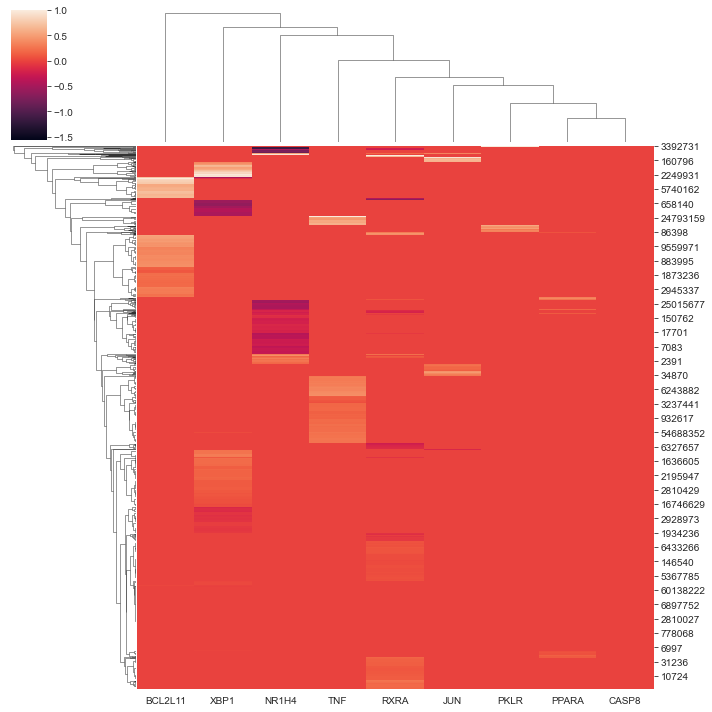

In [72]:
import seaborn as sns
sns.clustermap(score_frame_norm.replace([np.inf, -np.inf], 0))

In [55]:
TOX_FILE = "/Volumes/TOSHIBA EXT/data/Yitao/toxDB.txt"
TOX_COL = 'H_HT_class'

In [58]:
TOX_FILE = "/Volumes/TOSHIBA EXT/data/Yitao/toxDB.txt"
TOX_COL = 'H_HT_class'



tox_data = pd.read_table(TOX_FILE)

tox_data['Zhu_ID'] = ['ZhuMol_{}'.format(i) for i in range(len(tox_data))]

tox_data = tox_data[['PUBCHEM_CIDS', TOX_COL, 'Zhu_ID']]
tox_data = tox_data[tox_data[TOX_COL].notnull()]
tox_data = tox_data[tox_data['PUBCHEM_CIDS'].notnull()]

tox_data = tox_data.assign(PUBCHEM_CID=tox_data.PUBCHEM_CIDS.str.split(",")).drop(['PUBCHEM_CIDS'], axis=1).explode('PUBCHEM_CID')
tox_data = tox_data.rename(columns={TOX_COL: 'TOXICITY'})
tox_data['PUBCHEM_CID'] = tox_data['PUBCHEM_CID'].astype(int)

In [63]:
d = score_frame_norm.reset_index().rename(columns={'index': 'PUBCHEM_CID'})

In [67]:
d2 = tox_data.merge(d)

In [69]:
d2.TOXICITY.sum()

32.0

In [76]:
d2

,TOXICITY,Zhu_ID,PUBCHEM_CID,PKLR,TNF,BCL2L11,XBP1,PPARA,NR1H4,RXRA,CASP8,JUN
0,1.0,ZhuMol_805,5430,0.0,0.0,-0.0,0.000000,0.000000,0.000000,0.115327,0.0,-0.000000
1,1.0,ZhuMol_854,17038,0.0,-0.0,0.0,0.000000,-0.000000,-0.000000,-0.143060,0.0,-0.000000
2,0.0,ZhuMol_1364,5634,0.0,0.0,-0.0,-0.000000,-0.000000,-0.000000,0.103626,0.0,0.000000
3,1.0,ZhuMol_1564,5546,-0.0,0.0,0.0,0.000000,0.000000,0.282044,0.224229,0.0,-0.000000
4,1.0,ZhuMol_1754,2082,0.0,-0.0,0.0,0.000000,0.000000,-0.362336,-0.000000,0.0,0.000000
5,1.0,ZhuMol_2204,2406,-0.0,-0.0,0.0,0.000000,0.031319,0.000000,-0.058847,0.0,0.000000
6,0.0,ZhuMol_2215,5564,-0.0,-0.0,0.0,-0.000000,0.000000,-0.000000,-0.058780,0.0,0.000000
7,1.0,ZhuMol_2275,3037,-0.0,0.0,0.0,-0.000000,-0.000000,-0.621898,-0.196429,0.0,-0.000000
8,1.0,ZhuMol_2771,4477,0.0,0.0,0.0,-0.000000,0.000000,-0.000000,-0.115395,0.0,-0.000000
9,0.0,ZhuMol_2887,8400,0.0,-0.0,0.0,-0.000000,-0.000000,-0.000000,0.043764,0.0,-0.000000


In [71]:
sns.clustermap(score_frame_norm.replace([np.inf, -np.inf], 0))

Index(['TOXICITY', 'Zhu_ID', 'PUBCHEM_CID', 'PKLR', 'TNF', 'BCL2L11', 'XBP1',
       'PPARA', 'NR1H4', 'RXRA', 'CASP8', 'JUN'],
      dtype='object')

In [87]:
t = ['PKLR', 'TNF', 'BCL2L11', 'XBP1', 'PPARA', 'NR1H4', 'RXRA', 'CASP8', 'JUN']

<AxesSubplot:>

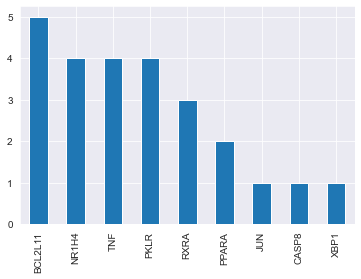

In [86]:
F_matrix.sum().sort_values(ascending=False).plot(kind='bar')

/opt/anaconda3/envs/intro-chem/lib/python3.7/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


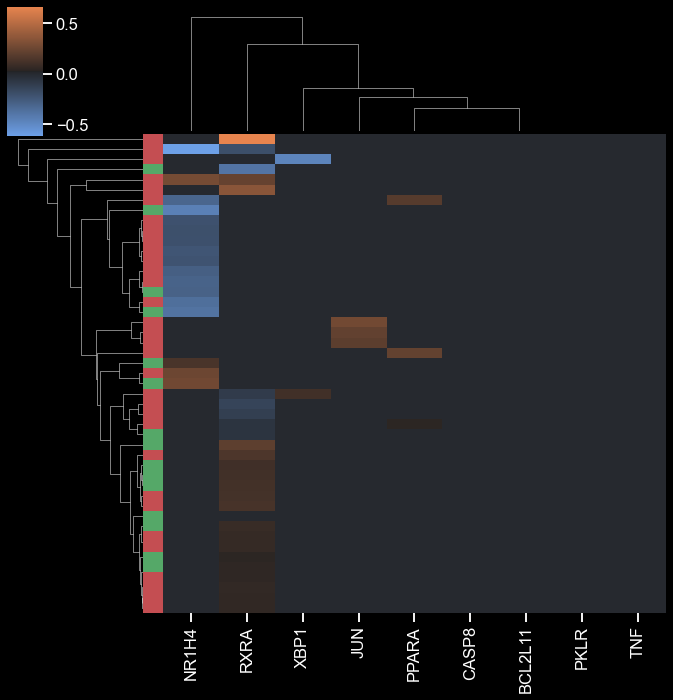

In [118]:
import matplotlib.pyplot as plt
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")


g = sns.clustermap(d2[t], row_colors=['r' if tox == 1 else 'g' for tox in d2.TOXICITY],
               cmap=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True),
                   tree_kws={'colors':['white' for _ in range(d2.shape[0])]},
                square=True, linecolor='grey', linewidths=.002,
)

g.ax_heatmap.set_yticks([])


plt.savefig('../data/figures/liver_nash_heatmap.png', transparent=True)

In [129]:
from sklearn.linear_model import LogisticRegressionCV


X = d2[t].values
y = d2.TOXICITY

clf = LogisticRegressionCV(cv=2, random_state=0).fit(X, y)
clf.score(X, y)

0.6808510638297872

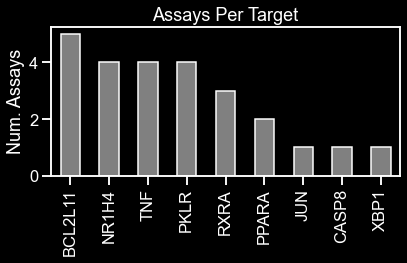

In [130]:
ax = F_matrix.sum().sort_values(ascending=False).plot(kind='bar', color='grey')

ax.set_title("Assays Per Target")
ax.set_ylabel("Num. Assays")

plt.tight_layout()
plt.savefig('../data/figures/bar.png', transparent=True)

In [131]:
clf.predict_proba(X)

array([[0.31914933, 0.68085067],
       [0.31915093, 0.68084907],
       [0.3191494 , 0.6808506 ],
       [0.31915032, 0.68084968],
       [0.3191479 , 0.6808521 ],
       [0.31915031, 0.68084969],
       [0.31915041, 0.68084959],
       [0.31914759, 0.68085241],
       [0.31915076, 0.68084924],
       [0.31914977, 0.68085023],
       [0.3191488 , 0.6808512 ],
       [0.31914937, 0.68085063],
       [0.31914825, 0.68085175],
       [0.31914789, 0.68085211],
       [0.31914868, 0.68085132],
       [0.31914872, 0.68085128],
       [0.31914885, 0.68085115],
       [0.31915151, 0.68084849],
       [0.31914735, 0.68085265],
       [0.3191509 , 0.6808491 ],
       [0.31914943, 0.68085057],
       [0.31914966, 0.68085034],
       [0.31914959, 0.68085041],
       [0.3191497 , 0.6808503 ],
       [0.31914904, 0.68085096],
       [0.31914916, 0.68085084],
       [0.31915249, 0.68084751],
       [0.31914913, 0.68085087],
       [0.3191508 , 0.6808492 ],
       [0.31914779, 0.68085221],
       [0.

In [ ]:
df2